 <h1>online_furniture_retailer</h1>

<h2>indroduction</h2>

the online furniture retailer dataset contains records of customer purchases made through an e-commerce platform. It includes details such as product categories, order quantities, prices, and dates of transactions. This data helps in understanding how customers shop for furniture online.

The dataset provides useful insights into sales trends, popular products, and customer behavior. By analyzing it, we can identify which items perform well, how sales change over time, and the factors that influence buying decisions.

Overall, this dataset is valuable for studying business performance and customer preferences. It can support decision-making in areas like inventory planning, marketing strategies, and improving customer satisfaction.


<h3>import the necessary libraries</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

<h3>import dataset</h3>

In [3]:
df=pd.read_csv("C:\\Users\\SWATHY\\OneDrive\\Desktop\\DataScience\\PROJECT\\online_furniture_retailer.csv")

<h3>Display the first 5 rows of the dataset</h3>

In [4]:
print(df.head())

  product_category product_subcategory             brand  delivery_status  \
0          Outdoor           Patio Set      World Market  Failed Delivery   
1      Living Room                Sofa          West Elm        Cancelled   
2      Dining Room           Bar Stool  Ashley Furniture        Delivered   
3      Dining Room       China Cabinet         HomeGoods          Pending   
4      Dining Room       China Cabinet               CB2          Pending   

   assembly_service_requested    payment_method  order_id  customer_id  \
0                        True       Credit Card     93810         2824   
1                        True         Apple Pay     13278         5506   
2                       False  Cash on Delivery     42098         4657   
3                       False        Google Pay     28289         2679   
4                        True         Apple Pay     98696         9935   

   product_price  shipping_cost  assembly_cost  total_amount  \
0         191.27          45

<h3>Display the last 5 rows of the dataset</h3>

In [5]:
print(df.tail())

     product_category product_subcategory             brand delivery_status  \
1933          Bedroom    Chest of Drawers         Overstock       Delivered   
1934      Dining Room        Dining Chair      Pottery Barn      In Transit   
1935           Office                Desk  Ashley Furniture         Pending   
1936      Living Room            Armchair           Wayfair      In Transit   
1937          Kitchen     Kitchen Cabinet          West Elm         Pending   

      assembly_service_requested    payment_method  order_id  customer_id  \
1933                       False            PayPal     84537         1474   
1934                        True  Cash on Delivery     32772         4158   
1935                        True  Cash on Delivery     36309         1944   
1936                        True        Google Pay     42701         1541   
1937                       False  Cash on Delivery     69827         1828   

      product_price  shipping_cost  assembly_cost  total_amoun

<h3>Data cleaning</h3>

In [6]:
print(df.isna().sum())

product_category                0
product_subcategory             0
brand                          96
delivery_status                 0
assembly_service_requested      0
payment_method                  0
order_id                        0
customer_id                     0
product_price                   0
shipping_cost                  58
assembly_cost                  38
total_amount                    0
delivery_window_days            0
customer_rating               280
dtype: int64


In [9]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ','_')

In [10]:
# Check for duplicate rows
df.duplicated().sum()

0

<h3>Data Understanding</h3>

In [11]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category            1938 non-null   object 
 1   product_subcategory         1938 non-null   object 
 2   brand                       1842 non-null   object 
 3   delivery_status             1938 non-null   object 
 4   assembly_service_requested  1938 non-null   bool   
 5   payment_method              1938 non-null   object 
 6   order_id                    1938 non-null   int64  
 7   customer_id                 1938 non-null   int64  
 8   product_price               1938 non-null   float64
 9   shipping_cost               1880 non-null   float64
 10  assembly_cost               1900 non-null   float64
 11  total_amount                1938 non-null   float64
 12  delivery_window_days        1938 non-null   int64  
 13  customer_rating             1658 

In [12]:
# Use summary statistics to understand distributions.
print(df.describe())

           order_id  customer_id  product_price  shipping_cost  assembly_cost  \
count   1938.000000  1938.000000    1938.000000    1880.000000    1900.000000   
mean   55199.490712  5592.021672    1155.930026      69.622250      62.698137   
std    25852.427404  2611.344607     658.490908      47.555003      82.552601   
min    10053.000000  1009.000000      81.430000       0.000000       0.000000   
25%    32218.750000  3290.000000     609.242500      32.585000       0.000000   
50%    54741.000000  5703.000000    1076.230000      74.055000      26.285000   
75%    77773.500000  7867.250000    1628.550000     107.735000     106.115000   
max    99952.000000  9998.000000    2979.560000     150.000000     299.350000   

       total_amount  delivery_window_days  customer_rating  
count   1938.000000           1938.000000      1658.000000  
mean    1288.390010              7.528380         3.059047  
std      669.228652              3.987004         1.152078  
min      146.930000       

In [13]:
#Find the most popular product categories
df['product_category'].value_counts()

Outdoor        338
Living Room    333
Office         324
Kitchen        322
Bedroom        318
Dining Room    303
Name: product_category, dtype: int64

In [14]:
#Which brand has the highest sales revenue?
brand_revenue = df.groupby('brand')['total_amount'].sum().sort_values(ascending=False)
print(brand_revenue.head(10))

brand
Overstock           220392.97
Ashley Furniture    208714.57
World Market        204412.63
Target              199745.71
CB2                 199212.56
IKEA                194711.43
Urban Outfitters    193460.99
HomeGoods           192746.79
West Elm            191679.18
Crate & Barrel      190915.92
Name: total_amount, dtype: float64


In [15]:
#Average customer rating by product category
avg_rating = df.groupby('product_category')['customer_rating'].mean()
print(avg_rating)


product_category
Bedroom        3.068613
Dining Room    3.110305
Kitchen        3.128464
Living Room    2.968070
Office         2.947253
Outdoor        3.132660
Name: customer_rating, dtype: float64


In [16]:
# Which payment methods are most used?
df['payment_method'].value_counts()


Credit Card         302
Apple Pay           293
Cash on Delivery    287
Debit Card          287
Google Pay          272
Bank Transfer       257
PayPal              240
Name: payment_method, dtype: int64

In [17]:
#Delivery success rate (Delivered vs others)
delivery_status = df['delivery_status'].value_counts(normalize=True) * 100
print(delivery_status)


Delivered          17.750258
Failed Delivery    16.821465
Pending            16.460268
Cancelled          16.408669
In Transit         16.305470
Rescheduled        16.253870
Name: delivery_status, dtype: float64


In [18]:
#Total revenue trend by category
category_revenue = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)
print(category_revenue)


product_category
Bedroom        516730.84
Living Room    483166.13
Kitchen        480646.75
Outdoor        378300.86
Dining Room    342392.30
Office         295662.96
Name: total_amount, dtype: float64


In [19]:
#How does assembly service affect total amount?
assembly_effect = df.groupby('assembly_service_requested')['total_amount'].mean()
print(assembly_effect)

assembly_service_requested
False    1218.881411
True     1356.198094
Name: total_amount, dtype: float64


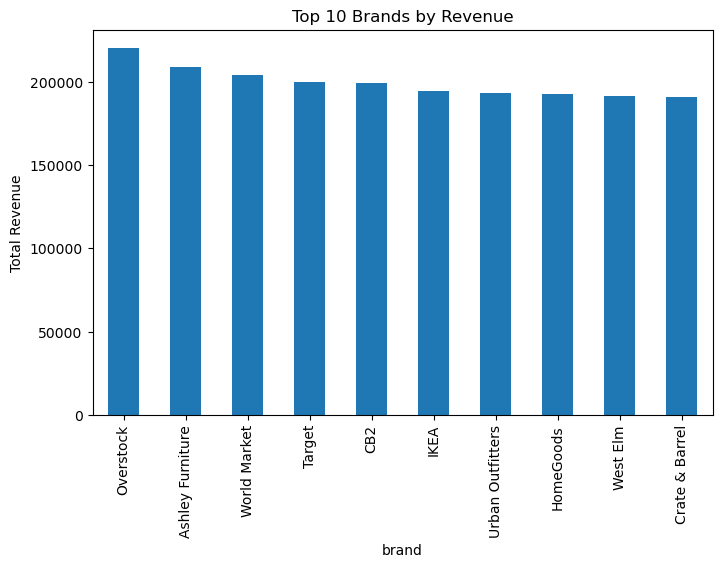

In [20]:
# Which brands generate the most sales revenue?

brand_revenue = df.groupby('brand')['total_amount'].sum().sort_values(ascending=False).head(10)
brand_revenue.plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Brands by Revenue")
plt.ylabel("Total Revenue")
plt.show()

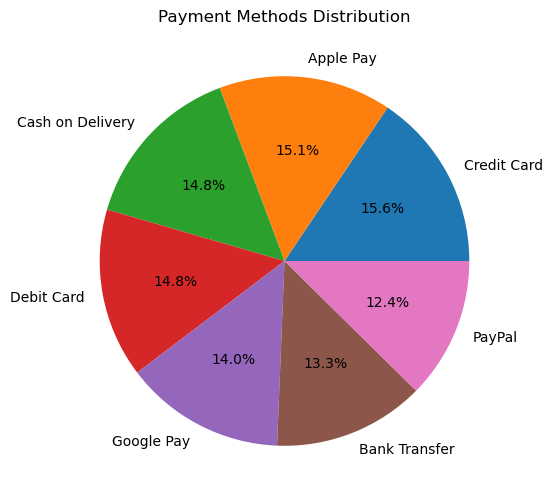

In [21]:
#What payment methods do customers prefer?

df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Payment Methods Distribution")
plt.ylabel("")
plt.show()

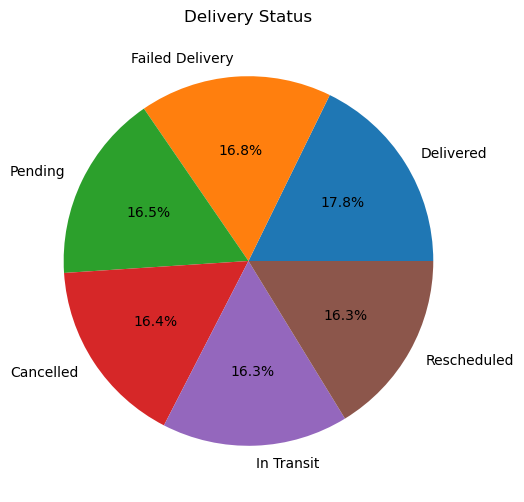

In [22]:
#What percentage of orders were delivered, failed, or cancelled?

df['delivery_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Delivery Status")
plt.ylabel("")
plt.show()

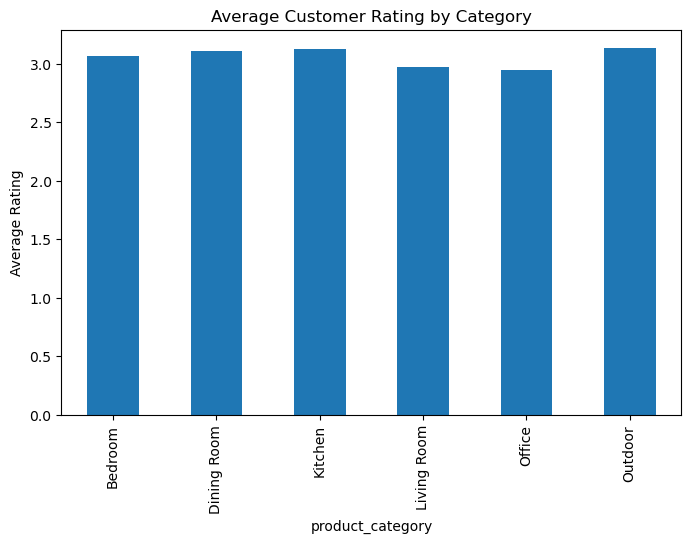

In [23]:
#Which categories get better ratings?

avg_rating = df.groupby('product_category')['customer_rating'].mean().dropna()
avg_rating.plot(kind='bar', figsize=(8,5))
plt.title("Average Customer Rating by Category")
plt.ylabel("Average Rating")
plt.show()

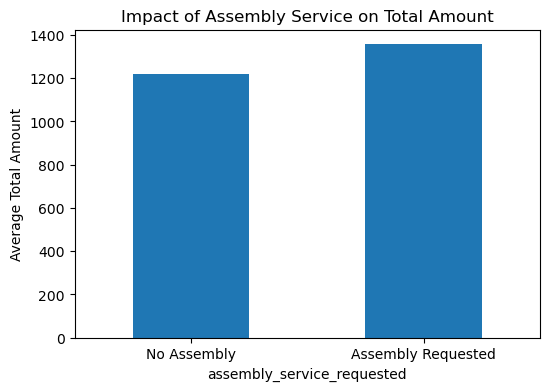

In [24]:
#Do customers who request assembly spend more?

assembly_effect = df.groupby('assembly_service_requested')['total_amount'].mean()
assembly_effect.plot(kind='bar', figsize=(6,4))
plt.title("Impact of Assembly Service on Total Amount")
plt.ylabel("Average Total Amount")
plt.xticks([0,1], ["No Assembly","Assembly Requested"], rotation=0)
plt.show()

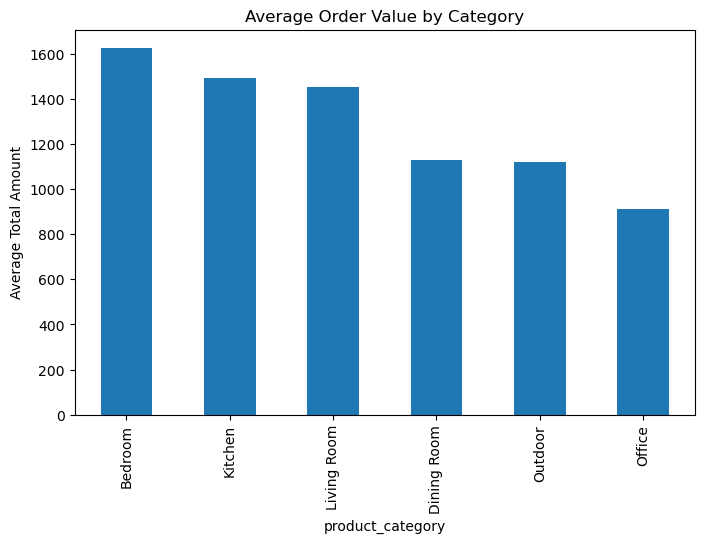

In [25]:
#Which product categories bring higher revenue per order?

avg_order = df.groupby('product_category')['total_amount'].mean().sort_values(ascending=False)
avg_order.plot(kind='bar', figsize=(8,5))
plt.title("Average Order Value by Category")
plt.ylabel("Average Total Amount")
plt.show()

<h3>Outlier Detection</h3>

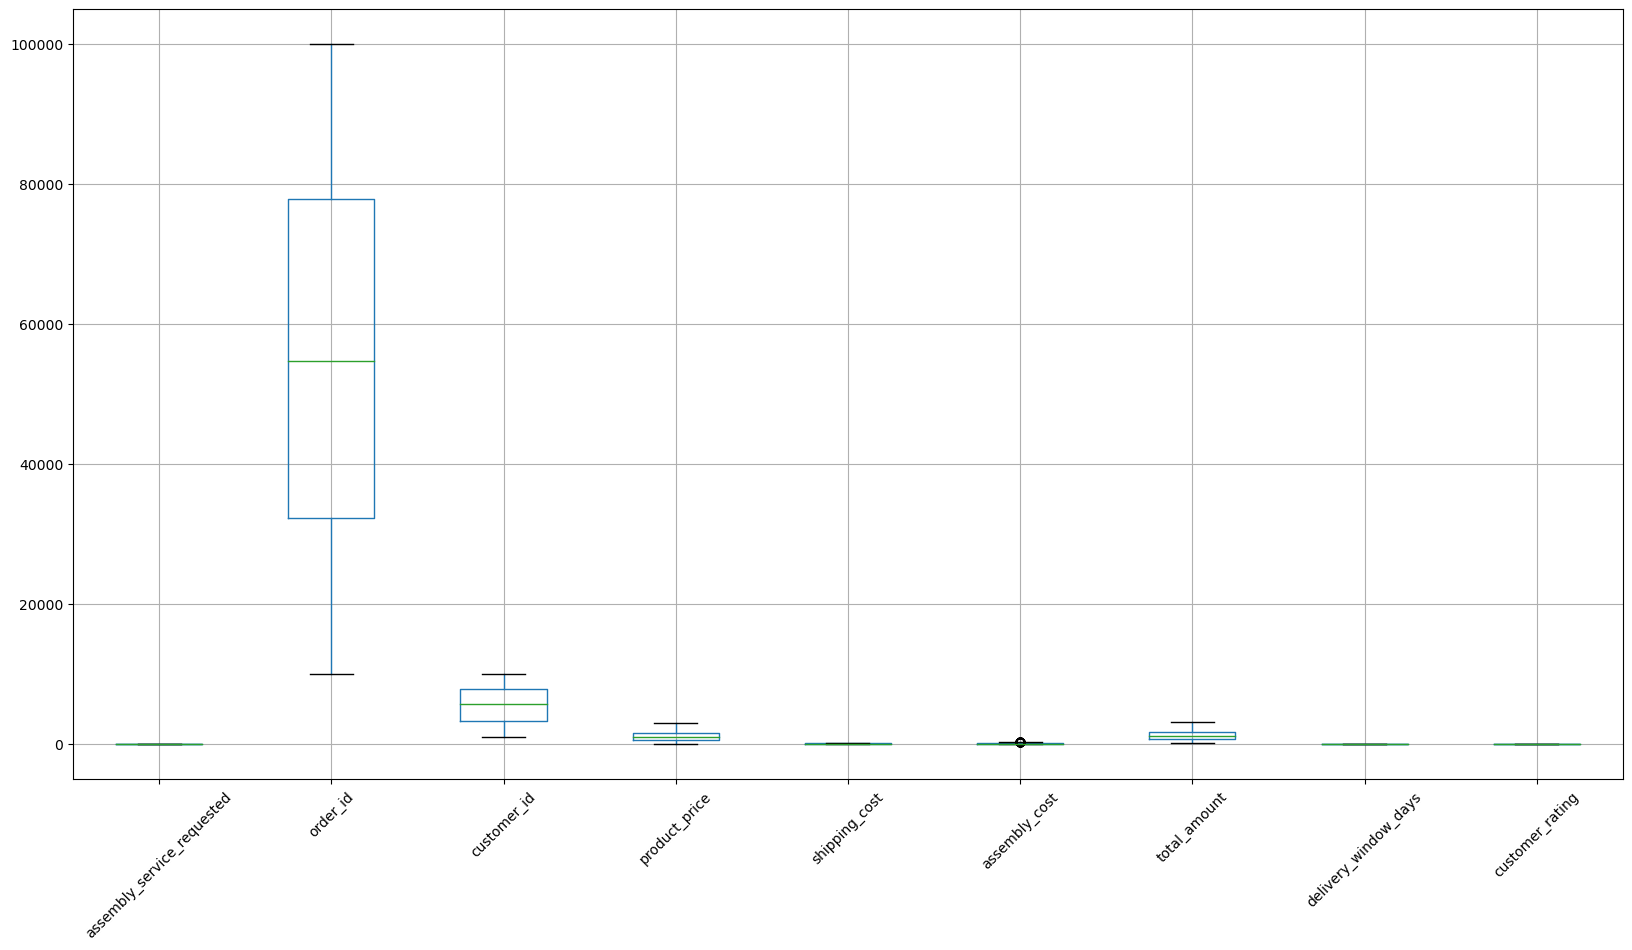

In [ ]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

<h3>Feature Engineering</h3>

In [ ]:


# 1. Discounted indicator: total_amount < (product_price + shipping_cost + assembly_cost)
df["is_discounted"] = df["total_amount"] < (df["product_price"] + df["shipping_cost"].fillna(0) + df["assembly_cost"].fillna(0))

# 2. Price per delivery day (helps normalize cost vs delivery speed)
df["price_per_day"] = df["total_amount"] / (df["delivery_window_days"] + 1)

# 3. High-value order flag
df["high_value_order"] = df["total_amount"] > df["total_amount"].median()

# 4. Customer repeat purchase flag (did customer appear more than once?)
df["is_repeat_customer"] = df["customer_id"].duplicated(keep=False)

# 5. Average rating per brand (fill missing ratings with brand mean)
df["brand_avg_rating"] = df.groupby("brand")["customer_rating"].transform(lambda x: x.fillna(x.mean()))

# 6. Net additional cost (shipping + assembly)
df["extra_cost"] = df["shipping_cost"].fillna(0) + df["assembly_cost"].fillna(0)

# 7. Profit proxy: product_price vs total_amount (could be adjusted if margin info exists)
df["margin_estimate"] = df["total_amount"] - df["extra_cost"]

# Preview engineered features
print(df.head(10))


  product_category product_subcategory             brand  delivery_status  \
0          Outdoor           Patio Set      World Market  Failed Delivery   
1      Living Room                Sofa          West Elm        Cancelled   
2      Dining Room           Bar Stool  Ashley Furniture        Delivered   
3      Dining Room       China Cabinet         HomeGoods          Pending   
4      Dining Room       China Cabinet               CB2          Pending   
5      Dining Room              Buffet          West Elm      Rescheduled   
6          Bedroom            Mattress              IKEA        Delivered   
7      Dining Room        Dining Table  Urban Outfitters  Failed Delivery   
8      Dining Room        Dining Chair          West Elm      Rescheduled   
9      Living Room                Sofa    Crate & Barrel        Delivered   

   assembly_service_requested    payment_method  order_id  customer_id  \
0                        True       Credit Card     93810         2824   
1   

<h3>Suggestions and Recommendations</h3>

<h4>Pricing Strategy</h4>
 Regularly review product prices and total amounts to avoid extreme outliers. Consider bundle offers (e.g., free assembly or free shipping above a certain price).

<h4>Customer Satisfaction</h4>
 Promote high-rated products and brands, while addressing issues with consistently low-rated ones. Reduce delivery days to improve customer experience.

<h4>Marketing & Sales </h4>
Focus campaigns on the most popular product categories and payment methods. Encourage digital payments through discounts or cashback offers.

<h4>Operations & Logistics</h4> 
 Minimize delivery failures by improving tracking systems. Since many customers request assembly services, offering free or discounted assembly can increase sales.

<h4>Future Growth </h4>
 Use customer purchase patterns to build a recommendation system, helping suggest related products and encouraging repeat purchases.